In [2]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5678)

[0.26456039 0.89367243 0.55275402 0.4121718  0.28307214 0.742975
 0.92637458 0.84958204 0.50339065 0.10423391]


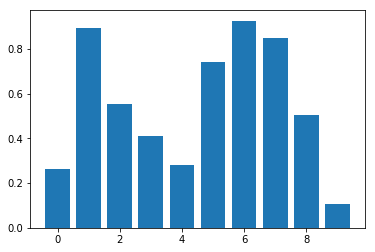

In [9]:
# declare some 
expected_action_value =  np.random.uniform(0 ,1 , 10)
print(expected_action_value)
plt.bar(range(10),expected_action_value)
plt.show()

In [24]:
# basic
estimated_action_value = np.zeros(10)
epsilon_values  = [0,0.25,0.5,0.75,1.0]

def reward_function1(action_taken, expected_action_value):
    if np.random.uniform(0, 1) <= expected_action_value[action_taken]: return 1
    return 0

def reward_function(action_taken, expected_action_value):
    if np.random.uniform(0, 1) <= expected_action_value[action_taken]: return 1
    return -1

def multi_arm_bandit_problem(arms = 10, steps = 1000, e = 0.1, expected_action_value = []):
    overall_reward, optimal_action = [], []
    estimate_action_value = np.zeros(arms)
    count = np.zeros(arms)
    for s in range(0, steps):
        e_estimator = np.random.uniform(0, 1)
        action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(10))
        reward = reward_function(action, expected_action_value)
        estimate_action_value[action] = estimate_action_value[action] + (1/(count[action]+1)) * (reward - estimate_action_value[action])
        overall_reward.append(reward)
        optimal_action.append(action == np.argmax(expected_action_value))
        count[action] += 1
    return(overall_reward, optimal_action)

def run_game(runs = 20, steps = 1000, arms = 10):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = np.random.uniform(0, 1 , arms)
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(arms = arms, steps = steps, e = epsilon_values[e_step], expected_action_value = expected_action_value)
    rewards_avg = np.average(rewards, axis = 1)
    optimal_action_perc = np.average(optimal_actions, axis = 1)
    return (rewards_avg, optimal_action_perc)

In [25]:
for e_step in range(5):
    rewards_avg, optimal_action_perc = run_game()
    print(rewards_avg)
    print(optimal_action_perc)

[0.482 0.482 0.442 0.468 0.504 0.506 0.472 0.476 0.928 0.5   0.5   0.506
 0.954 0.966 0.936 0.476 0.234 0.476 0.486 0.494]
[0.    0.    0.    0.    0.    0.    0.    0.    0.965 0.    0.    0.
 0.994 0.992 0.969 0.    0.    0.    0.    0.   ]
[0.29  0.28  0.314 0.218 0.244 0.224 0.13  0.258 0.246 0.268 0.284 0.248
 0.14  0.14  0.22  0.318 0.298 0.218 0.208 0.164]
[0.769 0.67  0.739 0.03  0.485 0.504 0.024 0.52  0.695 0.689 0.708 0.693
 0.098 0.429 0.517 0.75  0.558 0.733 0.551 0.324]
[0.544 0.556 0.604 0.534 0.524 0.508 0.482 0.526 0.53  0.544 0.524 0.524
 0.56  0.512 0.522 0.516 0.482 0.556 0.488 0.51 ]
[0.501 0.54  0.361 0.065 0.128 0.541 0.126 0.532 0.426 0.064 0.528 0.042
 0.069 0.047 0.052 0.047 0.479 0.056 0.534 0.144]
[0.302 0.252 0.278 0.27  0.252 0.258 0.254 0.278 0.282 0.28  0.298 0.236
 0.326 0.304 0.22  0.222 0.296 0.306 0.234 0.174]
[0.329 0.302 0.337 0.28  0.31  0.268 0.294 0.277 0.31  0.322 0.326 0.34
 0.317 0.315 0.322 0.319 0.319 0.314 0.3   0.296]
[0.142 0.176 0.148 0

# Reference
1. Reinforcement Learning with Multi Arm Bandit – ITNEXT. (2018). ITNEXT. Retrieved 24 December 2018, from https://itnext.io/reinforcement-learning-with-multi-arm-bandit-decf442e02d2
2. matplotlib.pyplot.bar — Matplotlib 3.0.2 documentation. (2018). Matplotlib.org. Retrieved 24 December 2018, from https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
3. 